In [1]:
import pandas as pd
import datetime
from collections import Counter
import matplotlib.pyplot as plt
import time
import numpy as np
import json
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
data=pd.read_csv('dataset.csv')
pdata=[]
with open('../components/gis/geo/th-provinces-centroids.json', encoding='utf-8') as json_file:
    jsondata = json.load(json_file)
    for province in jsondata['features']:
        pdata.append(province['properties']['PROV_NAMT'])        
start = datetime.datetime.strptime("2020-12-15", "%Y-%m-%d")
end = datetime.datetime.today()
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
fulldate=[]
for date in date_generated:
    fulldate.append(date)    

provinces={}
lastRow=data.tail(1)
date=list(lastRow['announce_date'])[0].strip()
datasetUpdatedOn=datetime.datetime.strptime(date,'%m/%d/%y')                

for row in data.iterrows():
    row = dict(row[1])
    province = row['province_of_isolation']
    date = row['announce_date']
    if province in provinces:    
        if(isinstance(date, str)):
            parsedDate=datetime.datetime.strptime(date.strip(),'%m/%d/%y')                
            if(parsedDate>=start):
                provinces[province].append(parsedDate)            
    else:
        provinces[province]=[]
        
def movingAve(ys):
    N = 7
    cumsum, moving_aves = [0], []

    for i, x in enumerate(ys, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return(moving_aves)


In [3]:
provinces

{'กรุงเทพมหานคร': [datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 15, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 16, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),
  datetime.datetime(2020, 12, 17, 0, 0),

0.11072921752929688 กรุงเทพมหานคร
0.06881523132324219 นครปฐม
0.071807861328125 นนทบุรี
0.07178425788879395 ประจวบคีรีขันธ์
0.07382631301879883 ภูเก็ต
0.06881594657897949 เชียงใหม่
0.08081483840942383 กระบี่
0.08774185180664062 สมุทรปราการ
0.14327526092529297 ชลบุรี
0.09973311424255371 นครศรีธรรมราช
0.09674406051635742 สุพรรณบุรี
0.15808606147766113 ปทุมธานี
0.21045827865600586 สุโขทัย
0.10471868515014648 นราธิวาส
0.10272669792175293 ยะลา
0.10172748565673828 เพชรบูรณ์
0.11369490623474121 สุราษฎร์ธานี
0.13164710998535156 ปัตตานี
0.12666058540344238 ขอนแก่น
0.08975791931152344 ร้อยเอ็ด
0.09574675559997559 กาฬสินธุ์
0.10372781753540039 นครราชสีมา
0.08178162574768066 พัทลุง
0.07884716987609863 อุบลราชธานี
0.09774160385131836 สระบุรี
0.12067770957946777 ระยอง
0.09474658966064453 นครนายก
0.13863182067871094 สงขลา
0.1276569366455078 กาญจนบุรี
0.12167572975158691 ลพบุรี
0.1077113151550293 สุรินทร์
0.07879114151000977 เชียงราย
0.07679390907287598 สมุทรสาคร
0.1261892318725586 บุรีรัมย์
0.16707015

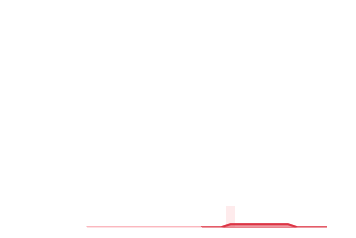

In [9]:

for name in provinces.keys():
    
    if(name in pdata):
        start=time.time()
        province=dict(Counter(provinces[name]))
        names=list(province.keys())
        values=list(province.values())
        for day in fulldate:
            if(day not in names):
                province[day]=0
        names=sorted(province)
        ys=[]
        for day in names:
            ys.append(province[day])
        moving_aves=movingAve(ys)
        fig = plt.gcf()        
        plt.cla()
        #fig.set_size_inches(10,8)
        if(max(ys)<10):
            plt.ylim(0,10)
        else:
            plt.ylim(0,max(ys))
        plt.fill_between(names[-14:],0,moving_aves[-14:], alpha=0.5, color='#dc3545', zorder=2)
        plt.fill_between(names[6:len(names)-13],0,moving_aves[:len(moving_aves)-13], alpha=0.3, color='#fa9ba4', zorder=2)
        plt.plot(names[6:],moving_aves, color='#fa9ba4',linewidth=2)
        plt.bar(names, ys, width=0.9,color='#fa9ba4', alpha=0.2)
        plt.plot(names[-14:],moving_aves[-14:], color='#dc3545',linewidth=2)         
        
        
        plt.box(False)
        #plt.tick_params(axis='y',length=16, width=2,direction='in',color='#e0e0e0',pad=10)        
        #plt.tick_params(axis='x',length=0, pad=10)
        #plt.xticks([min(names), max(names)],fontsize=24, color='#e0e0e0')        
        #plt.gca().xaxis.set_major_formatter(DateFormatter('%d %b'))

        plt.xticks([])
        plt.yticks([])
        plt.savefig('../public/graphs-build/'+str(pdata.index(name)+1)+'.svg',bbox_inches=0, transparent=True)        
        #plt.show()
        print(time.time()-start, name)
        

images=[]
for name in provinces.keys():
    if(name in pdata):
        fid = pdata.index(name)+1
        province=dict(Counter(provinces[name]))
        names=list(province.keys())
        values=list(province.values())
        for day in fulldate:
            if(day not in names):
                province[day]=0
        names=sorted(province)
        ys=[]
        for day in names:
            ys.append(province[day])
        
        moving_aves=movingAve(ys)

        change = moving_aves[-1]-movingAve(ys)[-14]
        images.append({
            'name':str(fid)+'.svg',
            'change': change,
            'total-14days': sum(ys[-14:]),
            'max': max(ys),
            'province': name,
        })

with open('../components/build_job.json', 'w', encoding='utf-8') as f:
    data={'images': images, 'job': {
        'ran_on': datetime.date.today().strftime("%m/%d/%Y %H:%M"),
        'dataset_updated_on': datasetUpdatedOn.strftime("%m/%d/%Y %H:%M")
    }}
    json.dump(data, f)
    f.close()
print('done')        
